In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def Noise(u):
    sv = np.array(u.dropna())
    #sv /= np.mean(sv)
    C1 = - sv[:-1]/np.sqrt(2) + sv[1:]/np.sqrt(2)
    SD1 = np.std(C1)
    C2 = sv[:-1]/np.sqrt(2) + sv[1:]/np.sqrt(2)
    SD2 = np.std(C2)
    return SD1, SD2

In [3]:
df = pd.read_csv ("Volumes.csv")
df

,SV_C1,SV_C2,SV_C3,SV_C4,SV_C5,SV_C6,SV_C7,SV_C8,SV_C9,SV_C10,...,SV_A1,SV_A2,SV_A3,SV_A4,SV_A5,SV_A6,SV_A7,SV_A8,SV_A9,SV_A10
0,22.465,24.729,24.266,27.611,20.631,17.086,17.170,12.767,28.667,27.237,...,17.716,15.327,10.864,13.776,10.851,5.607,1.891,18.158,18.580,7.874
1,24.170,23.711,22.824,24.537,21.912,17.031,18.483,18.032,33.434,28.286,...,17.646,11.703,10.998,13.400,11.194,6.096,2.333,18.104,18.427,11.698
2,23.869,19.292,24.436,22.639,21.066,16.648,20.635,19.200,31.021,29.893,...,17.021,11.122,10.344,13.172,11.558,5.068,2.642,17.263,18.685,9.465
3,22.044,27.727,27.769,23.727,21.701,18.781,18.050,14.873,29.819,29.444,...,15.787,10.239,7.968,13.581,10.716,5.726,2.561,15.967,14.321,12.643
4,22.703,26.480,26.977,24.986,20.386,16.011,20.064,13.174,28.448,29.228,...,17.645,10.924,9.568,14.063,11.018,5.625,3.220,18.493,21.134,8.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.819,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.454,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.204,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.144,NaN


In [4]:
controls = ("SV_C1", "SV_C2", "SV_C3", "SV_C4", "SV_C5", "SV_C6", "SV_C7", "SV_C8", "SV_C9", "SV_C10", "SV_C11", "SV_C12", "SV_C13", "SV_C14")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]) 
    

experiments = ("SV_A1", "SV_A2", "SV_A3", "SV_A4", "SV_A5", "SV_A6", "SV_A7", "SV_A8", "SV_A9", "SV_A10")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]) 


In [5]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([3.19624899, 1.08014166, 4.39950193, 1.24244668]),
 array([0.72865915, 0.20870822, 1.18324899, 0.18512642]))

(0.0, 6.5)

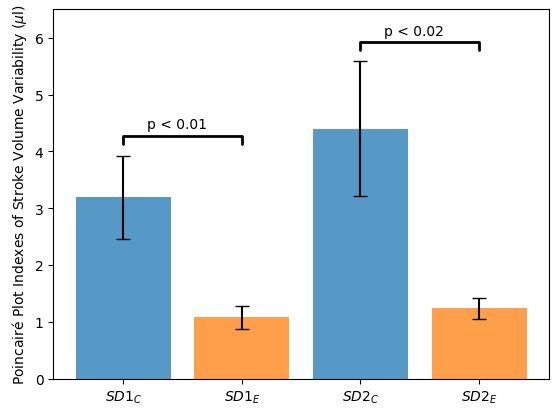

In [6]:
fig, ax = plt.subplots()
ax.bar(["$SD1_C$", "$SD1_E$", "$SD2_C$", "$SD2_E$"], means, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Poincairé Plot Indexes of Stroke Volume Variability ($\mu$l)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':20,'shrinkB':20,'linewidth':2}
ax.annotate("p < 0.01", xy=(.2, 4.4), zorder=10)
ax.annotate('', xy=(0,3.65), xytext=(1,3.65), arrowprops=props)
ax.annotate("p < 0.02", xy=(2.2, 6.05), zorder=10)
ax.annotate('', xy=(2,5.3), xytext=(3,5.3), arrowprops=props)
ax.set_ylim([0,6.5])

In [7]:
t_stat, p_value = stats.ttest_ind(SD1_C, SD1_E, equal_var=False)
p_value/2

0.008394846032957625

In [8]:
t_stat, p_value = stats.ttest_ind(SD2_C, SD2_E, equal_var=False)
p_value/2

0.01198196348463627

In [9]:
df = pd.read_csv ("Periods.csv")
df

,T_C1,T_C2,T_C3,T_C4,T_C5,T_C6,T_C7,T_C8,T_C9,T_C10,...,T_A1,T_A2,T_A3,T_A4,T_A5,T_A6,T_A7,T_A8,T_A9,T_A10
0,0.116,0.133,0.109,0.108,0.130,0.131,0.143,0.129,0.135,0.134,...,0.117,0.127,0.126,0.113,0.132,0.118,0.145,0.122,0.134,0.115
1,0.115,0.132,0.110,0.108,0.130,0.132,0.139,0.129,0.135,0.133,...,0.117,0.126,0.126,0.111,0.133,0.118,0.145,0.123,0.134,0.114
2,0.116,0.133,0.110,0.108,0.130,0.129,0.141,0.128,0.135,0.134,...,0.116,0.127,0.126,0.113,0.132,0.117,0.145,0.123,0.125,0.115
3,0.116,0.133,0.110,0.108,0.130,0.128,0.141,0.127,0.135,0.134,...,0.116,0.126,0.124,0.112,0.133,0.118,0.143,0.122,0.142,0.115
4,0.115,0.132,0.110,0.108,0.130,0.129,0.143,0.127,0.135,0.134,...,0.116,0.125,0.126,0.113,0.128,0.117,0.145,0.123,0.136,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,0.110,0.108,0.131,0.133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.131,0.118,0.144,0.122,0.134,NaN
68,NaN,NaN,0.109,0.108,0.130,0.132,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.133,0.118,0.143,0.124,0.134,NaN
69,NaN,NaN,0.111,0.108,0.131,0.127,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.132,0.118,0.145,NaN,0.134,NaN
70,NaN,NaN,0.109,0.108,0.131,0.133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.131,0.117,0.144,NaN,0.134,NaN


In [10]:
controls = ("T_C1", "T_C2", "T_C3", "T_C4", "T_C5", "T_C6", "T_C7", "T_C8", "T_C9", "T_C10", "T_C11", "T_C12", "T_C13", "T_C14")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]*1e3) 
    

experiments = ("T_A1", "T_A2", "T_A3", "T_A4", "T_A5", "T_A6", "T_A7", "T_A8", "T_A9", "T_A10")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]*1e3) 


In [11]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([1.27736331, 1.59812785, 1.10998201, 1.42002422]),
 array([0.29986596, 0.49108663, 0.31053078, 0.33586624]))

Text(0, 0.5, 'Poincairé Plot Indexes of Period Variability (ms)')

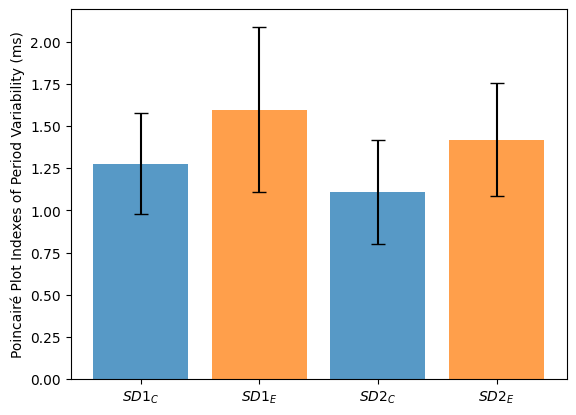

In [12]:
fig, ax = plt.subplots()
ax.bar(["$SD1_C$", "$SD1_E$", "$SD2_C$", "$SD2_E$"], means, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Poincairé Plot Indexes of Period Variability (ms)')

In [13]:
t_stat, p_value = stats.ttest_ind(SD1_C, SD1_E, equal_var=False)
p_value/2

0.30149497972624956

In [14]:
t_stat, p_value = stats.ttest_ind(SD2_C, SD2_E, equal_var=False)
p_value/2

0.26222424305100633